In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_excel('/content/Netflix Dataset.xls')


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7789 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7789 non-null   object
 1   Category      7789 non-null   object
 2   Title         7789 non-null   object
 3   Director      5401 non-null   object
 4   Cast          7071 non-null   object
 5   Country       7282 non-null   object
 6   Release_Date  7779 non-null   object
 7   Rating        7782 non-null   object
 8   Duration      7789 non-null   object
 9   Type          7789 non-null   object
 10  Description   7789 non-null   object
dtypes: object(11)
memory usage: 669.5+ KB


In [14]:
# Check the columns and data types
print(df.info())

# Remove duplicate rows if any
df = df.drop_duplicates()

# Check for missing values
print(df.isnull().sum())

# Fill or drop missing country information - here, we'll drop rows with missing country data
df = df.dropna(subset=['Country'])

# If there are multiple countries in one cell, split them for clear analysis
df['Country'] = df['Country'].apply(lambda x: x.split(',') if pd.notnull(x) else [])

# Explode the 'country' column so each country is a separate row
df_exploded = df.explode('Country')
df_exploded['Country'] = df_exploded['Country'].str.strip()

# Verify cleaning
df_exploded.head()

<class 'pandas.core.frame.DataFrame'>
Index: 7787 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       7787 non-null   object
 1   Category      7787 non-null   object
 2   Title         7787 non-null   object
 3   Director      5399 non-null   object
 4   Cast          7069 non-null   object
 5   Country       7280 non-null   object
 6   Release_Date  7777 non-null   object
 7   Rating        7780 non-null   object
 8   Duration      7787 non-null   object
 9   Type          7787 non-null   object
 10  Description   7787 non-null   object
dtypes: object(11)
memory usage: 730.0+ KB
None
Show_Id            0
Category           0
Title              0
Director        2388
Cast             718
Country          507
Release_Date      10
Rating             7
Duration           0
Type               0
Description        0
dtype: int64


,Show_Id,Category,Title,Director,Cast,Country,Release_Date,Rating,Duration,Type,Description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,07:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",PG-13,123 min,Dramas,A brilliant group of students become card-coun...


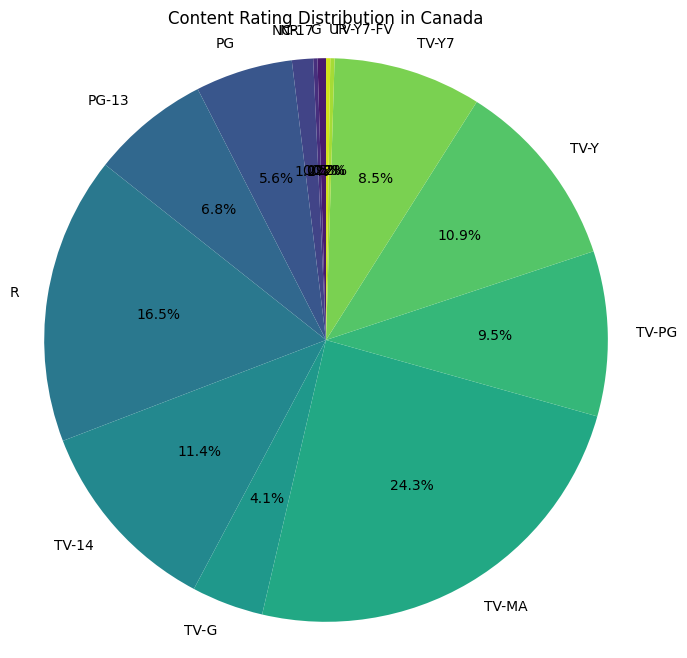

In [26]:
# Filter the data for Canada
canada_ratings = country_rating_counts[country_rating_counts['Country'] == 'Canada']

# Create a pie chart for Canada
plt.figure(figsize=(8, 8))
plt.pie(canada_ratings['Count'], labels=canada_ratings['Rating'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(canada_ratings)))
plt.title('Content Rating Distribution in Canada')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

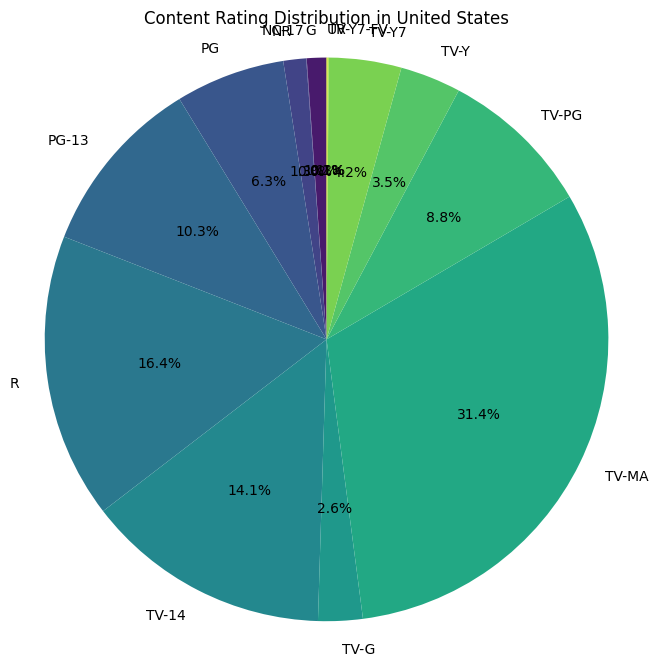

In [25]:
# Create a pie chart for the United States
plt.figure(figsize=(8, 8))
plt.pie(us_ratings['Count'], labels=us_ratings['Rating'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(us_ratings)))
plt.title('Content Rating Distribution in United States')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [24]:
us_ratings = country_rating_counts[country_rating_counts['Country'] == 'United States']
display(us_ratings)

,Country,Rating,Count
469,United States,G,37
470,United States,NC-17,1
471,United States,NR,43
472,United States,PG,207
473,United States,PG-13,340
474,United States,R,539
475,United States,TV-14,464
476,United States,TV-G,84
477,United States,TV-MA,1034
478,United States,TV-PG,289


In [23]:
df_exploded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9067 entries, 0 to 7788
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Show_Id       9067 non-null   object
 1   Category      9067 non-null   object
 2   Title         9067 non-null   object
 3   Director      6669 non-null   object
 4   Cast          8279 non-null   object
 5   Country       9067 non-null   object
 6   Release_Date  9058 non-null   object
 7   Rating        9061 non-null   object
 8   Duration      9067 non-null   object
 9   Type          9067 non-null   object
 10  Description   9067 non-null   object
dtypes: object(11)
memory usage: 850.0+ KB


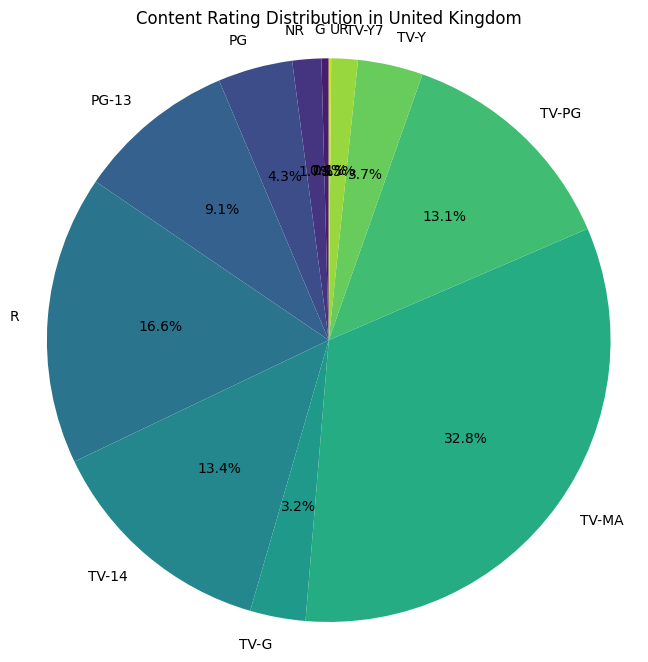

In [22]:
# Filter the data for United Kingdom
uk_ratings = india_uk_rating_counts[india_uk_rating_counts['Country'] == 'United Kingdom']

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(uk_ratings['Count'], labels=uk_ratings['Rating'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('viridis', len(uk_ratings)))
plt.title('Content Rating Distribution in United Kingdom')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

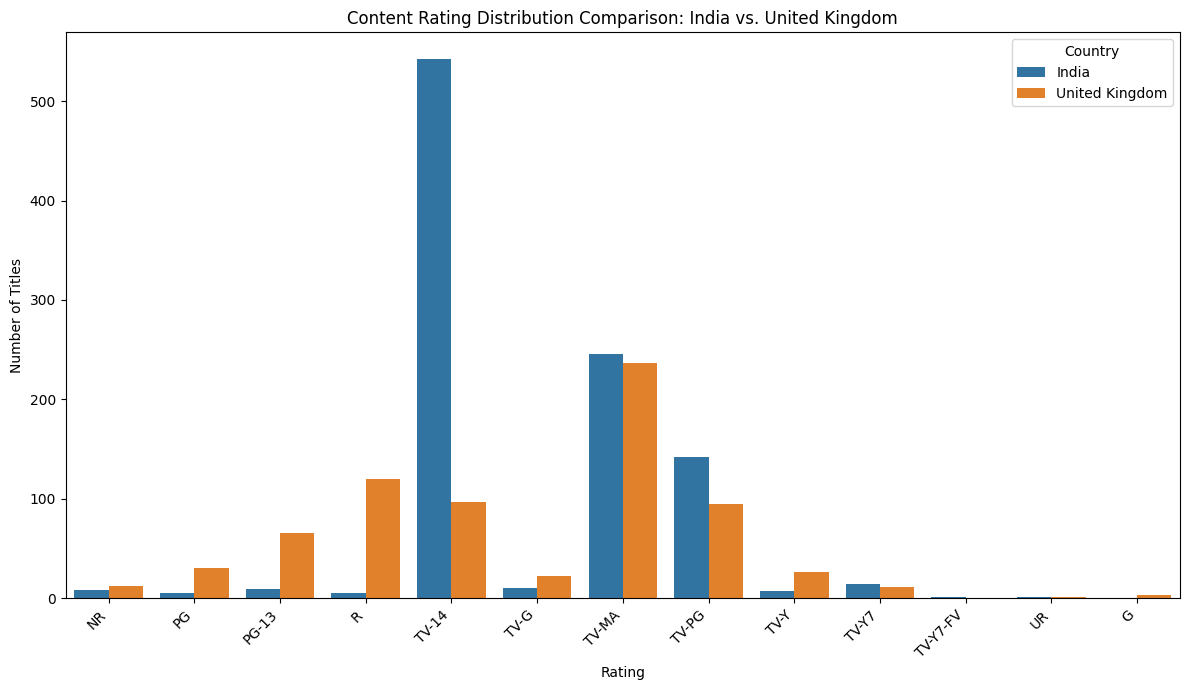

In [20]:
# Filter the country_rating_counts dataframe for India and United Kingdom
india_uk_rating_counts = country_rating_counts[country_rating_counts['Country'].isin(['India', 'United Kingdom'])]

# Create a bar chart to compare ratings
plt.figure(figsize=(12, 7))
sns.barplot(data=india_uk_rating_counts, x='Rating', y='Count', hue='Country')
plt.title('Content Rating Distribution Comparison: India vs. United Kingdom')
plt.xlabel('Rating')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

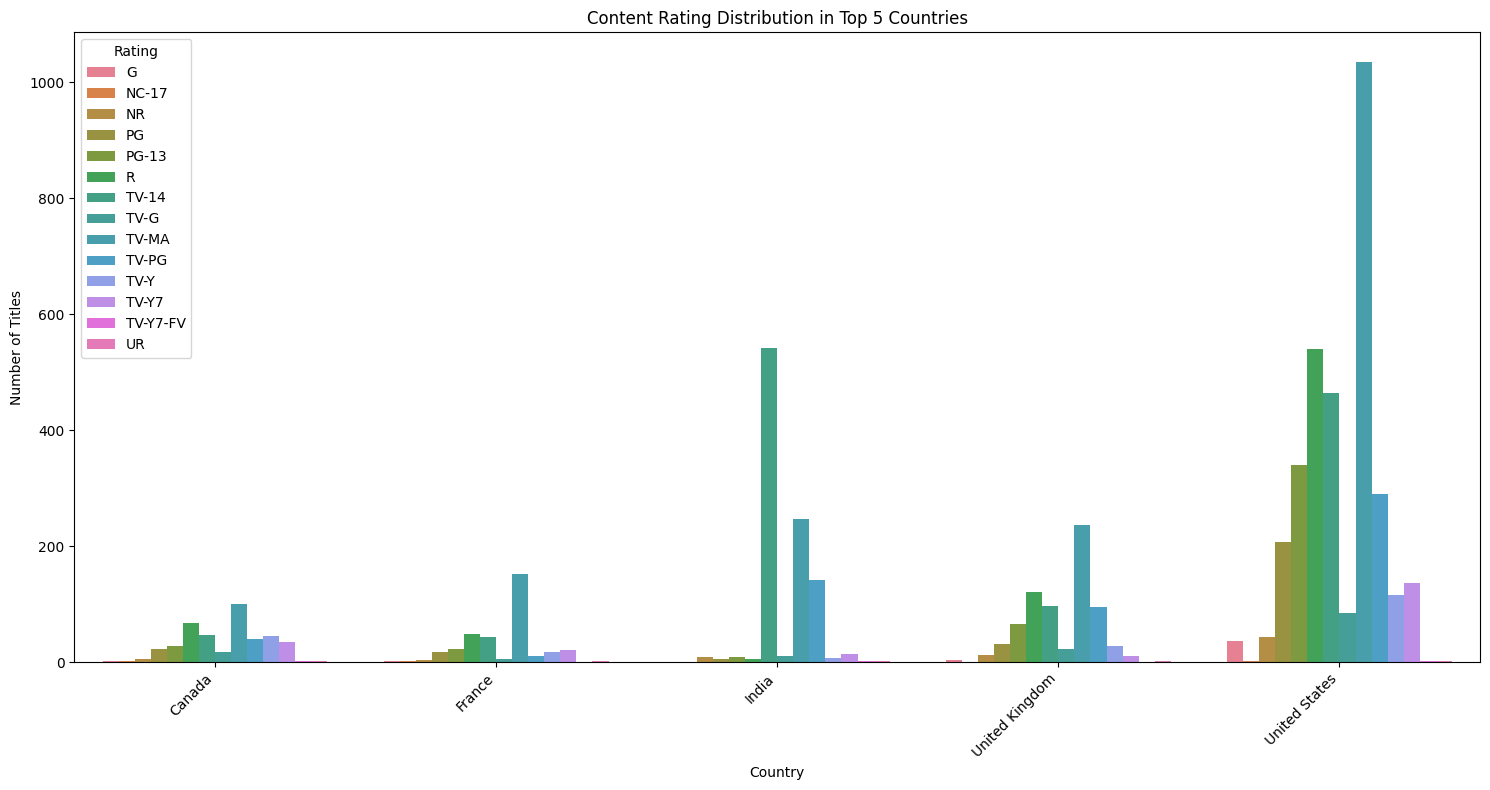

In [19]:
# Get the top 5 countries by total content
top_countries = country_total_content.head(5).index

# Filter the country_rating_counts dataframe for these top countries
top_countries_rating_counts = country_rating_counts[country_rating_counts['Country'].isin(top_countries)]

# Create a bar chart
plt.figure(figsize=(15, 8))
sns.barplot(data=top_countries_rating_counts, x='Country', y='Count', hue='Rating')
plt.title('Content Rating Distribution in Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [18]:
country_total_content = country_rating_pivot.sum(axis=1).sort_values(ascending=False)
display(country_total_content.head())

,0
Country,
United States,3294.0
India,990.0
United Kingdom,723.0
Canada,412.0
France,349.0


# Task
Analyze content ratings by country using the dataframe `df_exploded`.

## Group and count

### Subtask:
Group the exploded dataframe by 'Country' and 'Rating' and count the occurrences of each combination.


**Reasoning**:
Group the exploded dataframe by 'Country' and 'Rating' and count the occurrences of each combination.



In [15]:
country_rating_counts = df_exploded.groupby(['Country', 'Rating']).size().reset_index(name='Count')
country_rating_counts.head()

,Country,Rating,Count
0,,TV-14,1
1,,TV-MA,3
2,Afghanistan,TV-MA,1
3,Albania,TV-MA,1
4,Algeria,TV-MA,2


## Visualize results

### Subtask:
Create a visualization (e.g., a heatmap or bar chart) to show the distribution of ratings across different countries.


**Reasoning**:
Create a pivot table from `country_rating_counts` and generate a heatmap to visualize the content rating distribution by country.



In [16]:
country_rating_pivot = country_rating_counts.pivot_table(index='Country', columns='Rating', values='Count').fillna(0)

plt.figure(figsize=(20, 15))
sns.heatmap(country_rating_pivot, cmap='viridis')
plt.title('Content Rating Distribution by Country')
plt.show()

NameError: name 'plt' is not defined

**Reasoning**:
Import the matplotlib.pyplot library and then create a pivot table from `country_rating_counts` and generate a heatmap to visualize the content rating distribution by country.



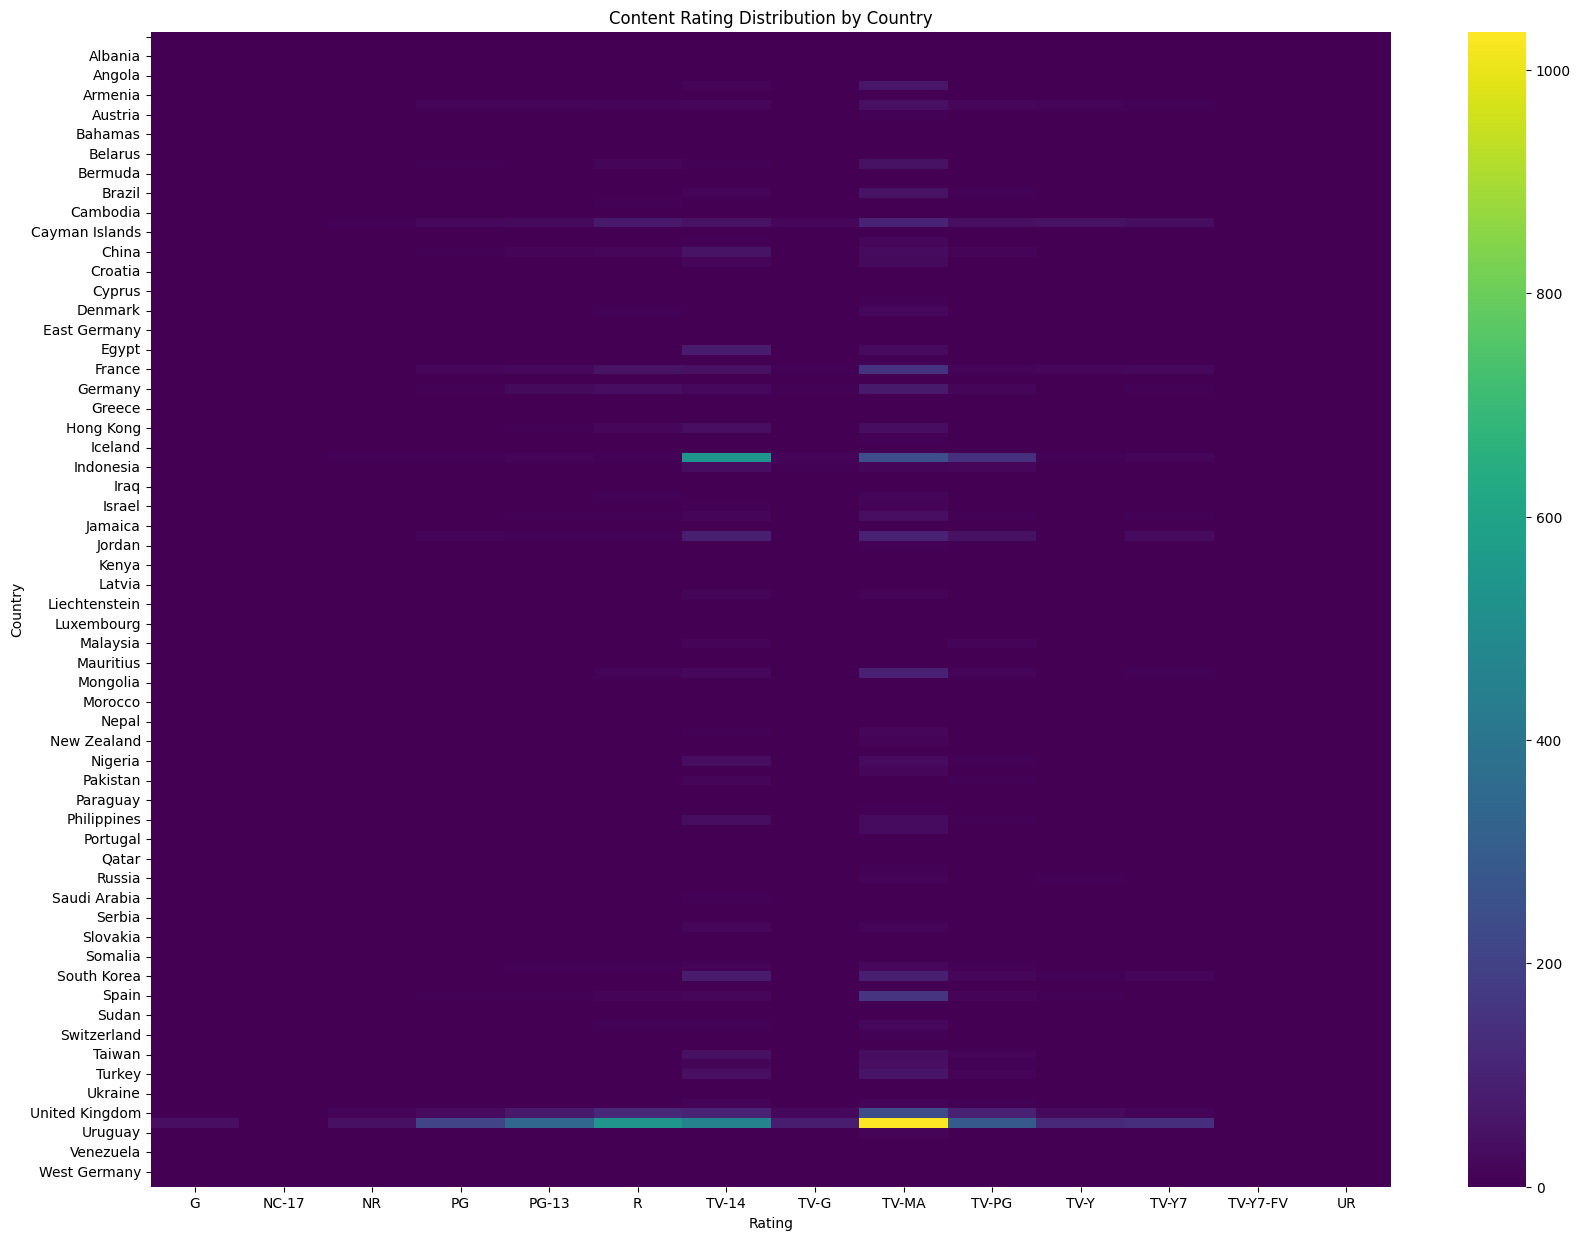

In [17]:
import matplotlib.pyplot as plt

country_rating_pivot = country_rating_counts.pivot_table(index='Country', columns='Rating', values='Count').fillna(0)

plt.figure(figsize=(20, 15))
sns.heatmap(country_rating_pivot, cmap='viridis')
plt.title('Content Rating Distribution by Country')
plt.show()

## Identify notable trends

### Subtask:
Analyze the visualization to identify any interesting patterns or trends in content ratings by country.


## Summary:

### Data Analysis Key Findings

*   The analysis successfully grouped content ratings by country and counted their occurrences.
*   A heatmap visualization was generated to illustrate the distribution of content ratings across different countries.
*   Analysis of the heatmap revealed that some countries have a high concentration of specific ratings, while certain ratings are prevalent across many countries.
*   Some countries showed a diverse distribution of ratings, and some ratings appeared rarely in the dataset.

### Insights or Next Steps

*   Further analysis could involve normalizing the counts to understand the *proportion* of each rating within a country, rather than just the absolute count, to account for varying total content volumes per country.
*   Investigating the specific content titles within countries exhibiting unusual or highly concentrated rating distributions could provide insights into local content preferences or distribution strategies.
